In [1]:
import moxing as mox
import os
mox.file.shift('os', 'mox')

INFO:root:Using MoXing-v1.15.1-3fc51aac
INFO:root:Using OBS-Python-SDK-3.1.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random

In [3]:
!pip install EMD-signal

    100% |████████████████████████████████| 163kB 7.8MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 15.5MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 87.0MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 52.9MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 120.9MB/s ta 0:00:011
  Running setup.py bdist_wheel for pathos ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/43/37/fd/8e8176ce272909725259bba231ce69c71aab4f0e2df19cc82e
  Running setup.py bdist_wheel for ppft ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/35/3a/66/94ae173e31492f97cf38feb3eda9934d66a3c6c86748cde0a1
  Running setup.py bdist_wheel for dill ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/2a/ff/6f/cabf21a89791c75def5605f6b217e936b67d9f659e8c64f4f8
  Running setup.py bdist_wheel for pox ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/8d/b6/36/0121e2f590b5bfc49d4163b09333485d11592eda8d59

In [4]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
from scipy import linalg
import scipy.ndimage as ndimage

In [5]:
from __future__ import division, print_function
from PyEMD import EEMD

# load data

In [8]:
# winter = np.load('obs://ltsa-eemd/winterscf/winterscf.npy')

In [9]:
winter.shape

(52, 720, 720)

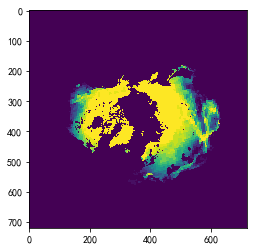

In [10]:
plt.imshow(winter[0])

In [11]:
wscf =winter.reshape(52,720*720)

In [12]:
wscf.shape

(52, 518400)

In [13]:
wscfn = wscf.mean(axis =0, keepdims=True)

In [14]:
wscfn.shape

(1, 518400)

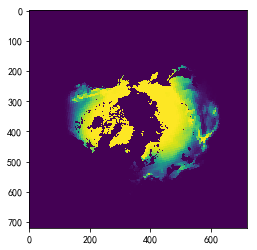

In [15]:
plt.imshow(wscfn.reshape(720,720))
plt.show()

In [16]:
wscfa = wscf-wscfn

In [17]:
wscfa.shape

(52, 518400)

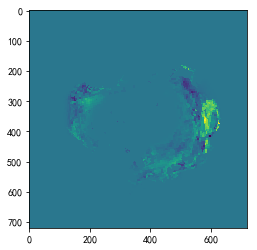

In [18]:
plt.imshow(wscfa[0].reshape(720,720))
plt.show()

In [19]:
wscfa.max()

86.63141025641025

In [20]:
wscfa.max(axis = 1)

array([86.63141026, 73.09935897, 69.19871795, 65.19871795, 72.81410256,
       43.60576923, 52.36538462, 64.76282051, 46.15384615, 36.21153846,
       36.81410256, 53.64423077, 45.53846154, 35.29807692, 66.27884615,
       61.76923077, 44.81410256, 42.98397436, 46.09294872, 39.66346154,
       47.26602564, 47.92307692, 39.51923077, 33.7724359 , 36.25      ,
       43.26602564, 40.23397436, 45.54166667, 46.66346154, 58.45833333,
       34.95512821, 71.66346154, 51.86858974, 64.64423077, 44.84935897,
       66.82051282, 47.18910256, 32.40384615, 56.62820513, 45.00320513,
       44.07692308, 50.93269231, 40.81410256, 41.73076923, 49.63782051,
       52.66025641, 66.93269231, 58.93269231, 70.93269231, 78.93269231,
       53.76602564, 78.93269231])

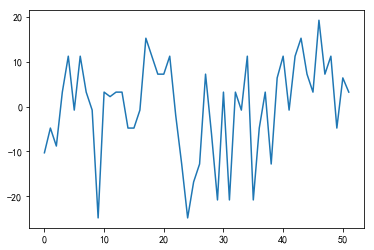

In [21]:
plt.plot(wscfa[:,179784])

# lag-1 auto corr

In [22]:
wscfadf = pd.DataFrame(wscfa)

In [23]:
wscfadf

,0,1,2,3,4,5,6,7,8,9,...,518390,518391,518392,518393,518394,518395,518396,518397,518398,518399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
lag1 = np.zeros((518400))
for i in range (518400):
    sr = wscfadf.iloc[:,i]
    lag1[i] = sr.autocorr()

In [5]:
lag1 = np.load('obs://ltsa-eemd/significance-test/lag1-auto-corr-arr/lag1.npy').reshape(518400)

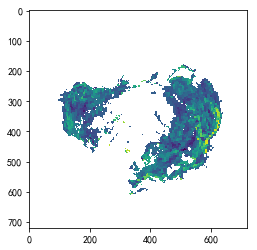

In [6]:
plt.imshow(lag1.reshape(720,720))
plt.show()

In [29]:
lag1.shape

(518400,)

In [30]:
lag1[0]

nan

# Functions 

### Function to generate red noise with specific lag1 auto corr

In [7]:
def sample_signal(n_samples, corr, mu=0, sigma=1):
#     assert 0 < corr < 1, "Auto-correlation must be between 0 and 1"

    # Find out the offset `c` and the std of the white noise `sigma_e`
    # that produce a signal with the desired mean and variance.
    # See https://en.wikipedia.org/wiki/Autoregressive_model
    # under section "Example: An AR(1) process".
    c = mu * (1 - corr)
    sigma_e = np.sqrt((sigma ** 2) * (1 - corr ** 2))

    # Sample the auto-regressive process.
    signal = [c + np.random.normal(0, sigma_e)]
    for _ in range(1, n_samples):
        signal.append(c + corr * signal[-1] + np.random.normal(0, sigma_e))

    return np.array(signal)

### Funciton of fast-MEEMD to get residue components

In [8]:
def fastmeemd(wscfa):
    
    # ltsa
    embedding = LocallyLinearEmbedding(n_neighbors = 50, n_components=50, method='ltsa')
    wscfa_trans = embedding.fit_transform(wscfa)
    w,resid,rank,sigma= linalg.lstsq(wscfa_trans,wscfa) # reconstrution weights
    
    #eemd
    eemd = EEMD()
    emd = eemd.EMD
    emd.extrema_detection="parabol"
    
    t = np.arange(1967,2019)
    res = np.zeros((52,50), dtype=np.float32)
    for i in range(50):
        eIMFs = eemd.eemd(wscfa_trans[:,i])
        nIMFs = eIMFs.shape[0]
        res [:,i] = eIMFs[-1]
#         no_pro = i+1
#         print("="*no_pro+'>'+'%d/50'%(i+1))
    rescp = np.dot(res, w).reshape(52,720,720) # residue component
    return rescp

### Function to get trend

In [9]:
def gettrend(yearsarr):
    rescp = fastmeemd (yearsarr)
    trend1973 = rescp[7] -  rescp[0]
    trend1980 = rescp[14] - rescp[0]
    trend1990 = rescp[24] - rescp[0]
    trend2000 = rescp[34] - rescp[0]
    trend2010 = rescp[44] - rescp[0]
    trend2018 = rescp[51] - rescp[0]
    return trend1973,trend1980,trend1990,trend2000,trend2010,trend2018

# Red noise trend and save

In [10]:
not_nan_index = np.where((~np.isnan(lag1))==True)

example

In [34]:
rednoise = np.zeros((52,518400))
for i in not_nan_index:
    rednoise[:,i] = sample_signal(52,lag1[i])

In [41]:
trend1973,trend1980,trend1990,trend2000,trend2010,trend2018 = gettrend(rednoise)

=>1/50
==>2/50
===>3/50
====>4/50
=====>5/50
======>6/50
=======>7/50
========>8/50
=========>9/50
==========>10/50
===========>11/50
============>12/50
=============>13/50
==============>14/50
===============>15/50
================>16/50
=================>17/50
==================>18/50
===================>19/50
====================>20/50
=====================>21/50
======================>22/50
=======================>23/50
========================>24/50
=========================>25/50
==========================>26/50
===========================>27/50
============================>28/50
=============================>29/50
==============================>30/50
===============================>31/50
================================>32/50
=================================>33/50
==================================>34/50
===================================>35/50
====================================>36/50
=====================================>37/50
======================================>38/50
==

In [42]:
trend1973.shape

(720, 720)

## 500 samples of rednoise at each grid

In [14]:
savepath = 'obs://ltsa-eemd/significance-test/noise_trend/'
for i in range(85,100):
    rednoise = np.zeros((52,518400))
    for j in not_nan_index:
        rednoise[:,j] = sample_signal(52,lag1[j])
    trend1973,trend1980,trend1990,trend2000,trend2010,trend2018 = gettrend(rednoise)
    np.save(savepath+'1973/'+'trend1973_'+str(i)+'.npy',trend1973)
    np.save(savepath+'1980/'+'trend1980_'+str(i)+'.npy',trend1980)
    np.save(savepath+'1990/'+'trend1990_'+str(i)+'.npy',trend1990)
    np.save(savepath+'2000/'+'trend2000_'+str(i)+'.npy',trend2000)
    np.save(savepath+'2010/'+'trend2010_'+str(i)+'.npy',trend2010)
    np.save(savepath+'2018/'+'trend2018_'+str(i)+'.npy',trend2018)
    print('%s done'%i)

85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done


# rednoise generator

In [28]:
def compute_corr_lag_1(signal):
    return np.corrcoef(signal[:-1], signal[1:])[0][1]

generate 2000 samples of red noise series of the same temporal data length (52) and lag-1 auto-correlation as the wscfa at each grid.

In [29]:
rednoise = np.zeros((52,518400,100))
for i in not_nan_index:
    for j in range (10):
        rednoise[:,i,j] = sample_signal(52,lag1[i])

In [ ]:
np.save('obs://ltsa-eemd/significance-test/rednoise_200/rednoise.npy',rednoise)

In [ ]:
rednoise.shape

In [ ]:
plt.imshow(rednoise[0,:,0].reshape(720,720))
plt.show()

noise lag1

In [61]:
noiselag1 = np.zeros((518400))
for i in range (518400):
    noiselag1[i] = compute_corr_lag_1(rednoise[:,i])

/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


noise lag1

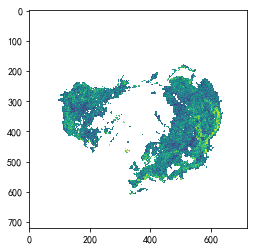

In [62]:
plt.imshow(noiselag1.reshape(720,720))
plt.show()

data lag1

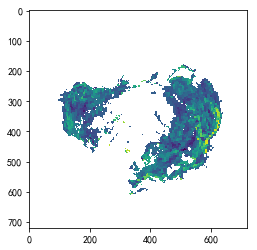

In [63]:
plt.imshow(lag1.reshape(720,720))
plt.show()

# Fast MEEMD on noise

## LTSA

In [32]:
embedding = LocallyLinearEmbedding(n_neighbors = 50, n_components=50, method='ltsa')

In [33]:
noise_trans = embedding.fit_transform(rednoise)

In [34]:
noise_trans.shape     # [n_samples, n_features]

(52, 50)

In [36]:
noise_trans

array([[-0.12403431,  0.17736128,  0.05398816, ..., -0.05165869,
         0.00758081, -0.02264508],
       [ 0.08296761, -0.18953422,  0.13724612, ...,  0.00526583,
         0.01331155, -0.01995102],
       [-0.12403431,  0.17736128,  0.05398816, ..., -0.05165869,
         0.00758081, -0.02264508],
       ...,
       [-0.05508851, -0.11763222, -0.0726291 , ..., -0.01514658,
         0.00445078, -0.01520665],
       [ 0.04427849,  0.1402972 ,  0.08446249, ..., -0.01251561,
         0.00880601, -0.00688527],
       [ 0.08296761, -0.18953422,  0.13724612, ...,  0.43651086,
         0.23149961, -0.14840294]])

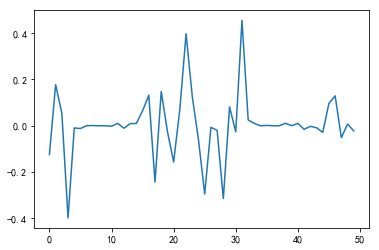

In [37]:
plt.plot(noise_trans[0])

In [39]:
w,resid,rank,sigma= linalg.lstsq(noise_trans,rednoise) 

In [40]:
reconstruction = np.dot(noise_trans, w)

In [41]:
reconstruction.shape    #[n_samples, n_features]

(52, 518400)

In [42]:
reconstruction.max(axis =1)   ## reconstruction is same with no sorted pcs

array([4.19237804, 4.01352689, 4.00323301, 4.5613215 , 4.59059825,
       4.28829156, 4.07755099, 4.03009138, 4.31498967, 3.95606838,
       4.44294877, 4.20557523, 4.25231504, 4.08900553, 4.14511284,
       4.60394191, 4.19293833, 4.39794203, 4.42581048, 4.11734249,
       4.63836412, 4.10758907, 4.0581146 , 4.39100535, 4.32534995,
       4.60647545, 4.18735264, 4.21494162, 4.3443975 , 4.45627142,
       4.08746034, 4.33848215, 4.42155743, 4.43640801, 4.95896236,
       4.0871969 , 4.22912345, 4.07082305, 4.05138241, 4.32268224,
       4.22489531, 4.16098846, 4.54028702, 4.00165386, 4.1173281 ,
       4.23776277, 4.49032252, 4.19457346, 3.92339877, 4.10158554,
       3.97857449, 4.88483355])

In [49]:
reconstruction.mean(axis = 0)[179784]

0.0034673511017846064

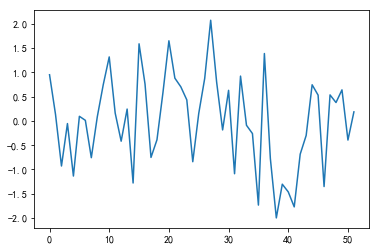

In [44]:
plt.plot(reconstruction[:,179784])

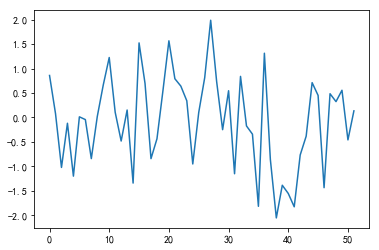

In [50]:
plt.plot(rednoise[:,179784])

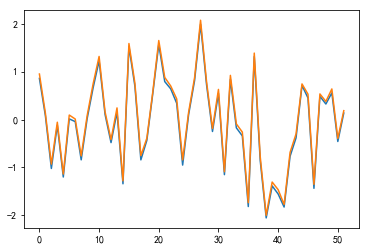

In [52]:
plt.plot(rednoise[:,179784])
plt.plot(reconstruction[:,179784])

## EEMD

In [53]:
eemd = EEMD()
emd = eemd.EMD
emd.extrema_detection="parabol"

In [54]:
t = np.arange(1967,2019)

In [38]:
t

array([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [39]:
len(t)

52

In [55]:
eIMFs_ex = eemd.eemd(noise_trans[:,0])

In [56]:
eIMFs_ex.shape

(5, 52)

In [58]:
No_IMFs = np.zeros(50)
for i in range(50):
    eIMFs = eemd.eemd(noise_trans[:,i])
    nIMFs = eIMFs.shape[0]
#     plt.figure(figsize=(15,3*46))
#     plt.subplot(46,1,i+1)
#     plt.plot(t,eIMFs[-1])
#     plt.ylabel("%d th IMFs4 "%i)
#     plt.show()
    No_IMFs[i] = nIMFs
print(No_IMFs)

[5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 5. 5. 5. 5. 5. 4. 5. 5. 5.
 6. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 4. 5. 5. 4.
 5. 5.]


In [60]:
IMFs5 = np.zeros((52,50), dtype=np.float32)
for i in range(50):
    eIMFs = eemd.eemd(noise_trans[:,i])
    nIMFs = eIMFs.shape[0]
    IMFs5[:,i]=eIMFs[-1]
    no_pro = i+1
    print("="*no_pro+'>'+'%d/50'%(i+1))

=>1/50
==>2/50
===>3/50
====>4/50
=====>5/50
======>6/50
=======>7/50
========>8/50
=========>9/50
==========>10/50
===========>11/50
============>12/50
=============>13/50
==============>14/50
===============>15/50
================>16/50
=================>17/50
==================>18/50
===================>19/50
====================>20/50
=====================>21/50
======================>22/50
=======================>23/50
========================>24/50
=========================>25/50
==========================>26/50
===========================>27/50
============================>28/50
=============================>29/50
==============================>30/50
===============================>31/50
================================>32/50
=================================>33/50
==================================>34/50
===================================>35/50
====================================>36/50
=====================================>37/50
======================================>38/50
==

In [64]:
IMFs5.shape

(52, 50)

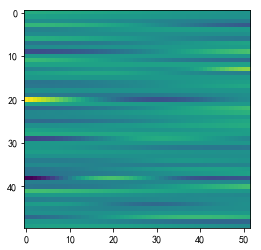

In [65]:
plt.imshow(IMFs5.T)
plt.show()

## Inverse transform

In [66]:
IIMFs5 = np.dot(IMFs5, w).reshape(52,720,720)

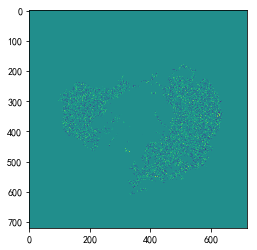

In [67]:
plt.imshow(IIMFs5[0])
plt.show()

## IMF5 Trend

In [68]:
IIMFs5.shape

(52, 720, 720)

In [69]:
IMFs5_trend = IIMFs5 - IIMFs5[0]

In [70]:
IMFs5_trend.shape

(52, 720, 720)

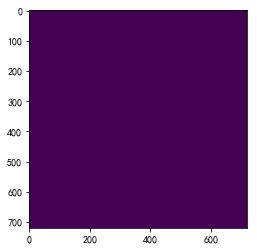

In [71]:
plt.imshow(IMFs5_trend[0])
plt.show()

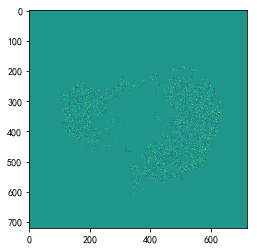

In [72]:
plt.imshow(IMFs5_trend[50])
plt.show()

In [73]:
np.save('obs://ltsa-eemd/significance-test/noise_IMFs5_trend.npy',IMFs5_trend)

check

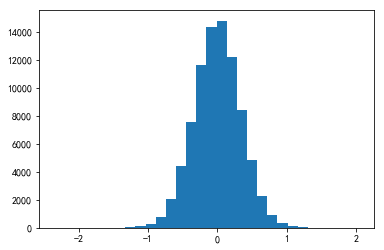

In [97]:
plt.hist(IMFs5_trend[40][IMFs5_trend[40]!=0],bins=30)
plt.show()

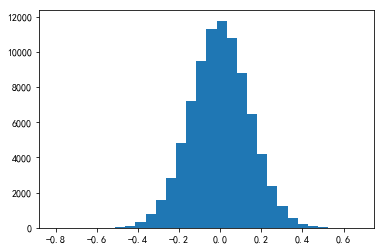

In [98]:
plt.hist(IMFs5_trend[10][IMFs5_trend[10]!=0],bins=30)
plt.show()

In [113]:
IMFs5_trend_plot = IMFs5_trend.reshape(52,518400)
# IMFs5_trend_plot = IMFs5_trend_plot[IMFs5_trend_plot!=0]
IMFs5_trend_plot.shape

(52, 518400)

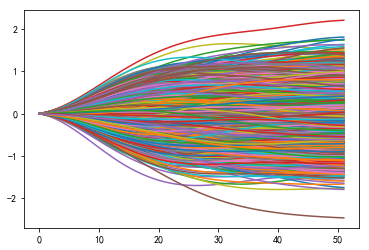

In [121]:
for i in not_nan_index[:100]:
    plt.plot(IMFs5_trend_plot[:,i])
plt.show()

## IMF5_Changing rate

In [74]:
IMFs5_rate = np.zeros((50,720,720))
for i in range(1,51):
    IMFs5_rate[i-1] = IIMFs5[i+1]- IIMFs5[i-1]
    print("IMF4_Changing_rate [%s] is done"%i)

IMF4_Changing_rate [1] is done
IMF4_Changing_rate [2] is done
IMF4_Changing_rate [3] is done
IMF4_Changing_rate [4] is done
IMF4_Changing_rate [5] is done
IMF4_Changing_rate [6] is done
IMF4_Changing_rate [7] is done
IMF4_Changing_rate [8] is done
IMF4_Changing_rate [9] is done
IMF4_Changing_rate [10] is done
IMF4_Changing_rate [11] is done
IMF4_Changing_rate [12] is done
IMF4_Changing_rate [13] is done
IMF4_Changing_rate [14] is done
IMF4_Changing_rate [15] is done
IMF4_Changing_rate [16] is done
IMF4_Changing_rate [17] is done
IMF4_Changing_rate [18] is done
IMF4_Changing_rate [19] is done
IMF4_Changing_rate [20] is done
IMF4_Changing_rate [21] is done
IMF4_Changing_rate [22] is done
IMF4_Changing_rate [23] is done
IMF4_Changing_rate [24] is done
IMF4_Changing_rate [25] is done
IMF4_Changing_rate [26] is done
IMF4_Changing_rate [27] is done
IMF4_Changing_rate [28] is done
IMF4_Changing_rate [29] is done
IMF4_Changing_rate [30] is done
IMF4_Changing_rate [31] is done
IMF4_Changing_rat

In [75]:
IMFs5_rate.shape

(50, 720, 720)

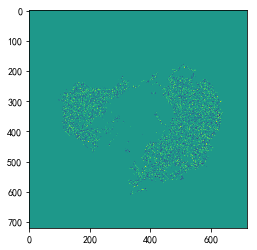

In [76]:
plt.imshow(IMFs5_rate[0])

In [77]:
np.save('obs://ltsa-eemd/significance-test/noise_IMFs5_rate.npy',IMFs5_rate)

# Significance Test

## step 1:
 divide the EEMD trend of that spatial location by the standard deviation of the corresponding temperature data

In [122]:
IMFs5_trend.shape

(52, 720, 720)

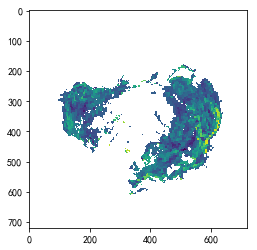

In [25]:
lag1 = lag1.reshape(720,720)
plt.imshow(lag1)
plt.show()

In [30]:
np.save('obs://ltsa-eemd/significance-test/lag1-auto-corr-arr/lag1.npy',lag1)

In [31]:
lag1[np.isnan(lag1)] = 0

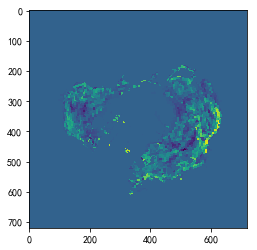

In [32]:
plt.imshow(lag1)
plt.show()